In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import stats

In [3]:
# I should change this to path format once we have similar file paths for the main

#Average rents for areas with a population of 10,000 and over path
file = r"E:\DataSci\Project 1\Datasets\Average rents for areas with a population of 10,000 and over\34100133.csv"
df = pd.read_csv(file)
# df.head()

C:\Users\LinkO\AppData\Local\Temp\ipykernel_888\3025532679.py:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [4]:
#reduced from raw data
reduced_df = df.loc[:, ["REF_DATE", "GEO","Type of structure", "Type of unit", "STATUS", "VALUE"]]

#cleaned data drawing from reduced df
prime_df = reduced_df[(reduced_df['REF_DATE'] >= 1991) & (reduced_df['REF_DATE'] <= 2021)]
#In the code below I remove unreliable data reported in 'STATUS' and blanks in 'VALUE'
prime_df = prime_df.loc[prime_df['STATUS'] != 'F'].dropna(subset=['VALUE'])
prime_df.head()

,REF_DATE,GEO,Type of structure,Type of unit,STATUS,VALUE
13648,1991,"Corner Brook, Newfoundland and Labrador",Apartment structures of six units and over,Bachelor units,NaN,357.0
13649,1991,"Corner Brook, Newfoundland and Labrador",Apartment structures of six units and over,One bedroom units,NaN,385.0
13650,1991,"Corner Brook, Newfoundland and Labrador",Apartment structures of six units and over,Two bedroom units,NaN,413.0
13651,1991,"Corner Brook, Newfoundland and Labrador",Apartment structures of six units and over,Three bedroom units,NaN,466.0
13665,1991,"Gander, Newfoundland and Labrador",Apartment structures of six units and over,One bedroom units,NaN,393.0


In [6]:
bachelor_df = prime_df[prime_df["Type of unit"] == "Bachelor units"]

average_bach_df = bachelor_df.groupby('REF_DATE')['VALUE'].mean().reset_index()

average_bach_df = average_bach_df.rename(columns={'VALUE': 'AVERAGE_VALUE'})

plt.plot(average_bach_df["REF_DATE"], average_bach_df["AVERAGE_VALUE"])
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Average Rent for Bachelor Units 1991-2020')
# plt.show()

Text(0.5, 1.0, 'Average Rent for Bachelor Units 1991-2020')

In [7]:
one_bedroom_df = prime_df[prime_df['Type of unit'] == 'One bedroom units']

average_one_bedroom_df = one_bedroom_df.groupby('REF_DATE')['VALUE'].mean().reset_index()
average_one_bedroom_df = average_one_bedroom_df.rename(columns={'VALUE': 'AVERAGE_VALUE'})

plt.plot(average_one_bedroom_df["REF_DATE"], average_one_bedroom_df["AVERAGE_VALUE"])
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Average Rent for One Bedroom Units 1991-2020')
# plt.show()

Text(0.5, 1.0, 'Average Rent for One Bedroom Units 1991-2020')

In [8]:
two_bedroom_df = prime_df[prime_df['Type of unit'] == 'Two bedroom units']

average_two_bedroom_df = two_bedroom_df.groupby('REF_DATE')['VALUE'].mean().reset_index()

average_two_bedroom_df = average_two_bedroom_df.rename(columns={'VALUE': 'AVERAGE_VALUE'})

plt.plot(average_two_bedroom_df["REF_DATE"], average_two_bedroom_df["AVERAGE_VALUE"])
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Average Rent for Two Bedroom Units 1991-2020')
# plt.show()

Text(0.5, 1.0, 'Average Rent for Two Bedroom Units 1991-2020')

In [55]:
three_bedroom_df = prime_df[prime_df['Type of unit'] == 'Three bedroom units']

average_three_bedroom_df = three_bedroom_df.groupby('REF_DATE')['VALUE'].mean().reset_index()
average_three_bedroom_df = average_three_bedroom_df.rename(columns={'VALUE': 'AVERAGE_VALUE'})

# plt.plot(average_three_bedroom_df["REF_DATE"], average_three_bedroom_df["AVERAGE_VALUE"])
# plt.xlabel('Year')
# plt.ylabel('Values')
# plt.title('Average Rent for Three Bedroom Units 1991-2020')
# plt.show()

In [ ]:
# /
# /
# /
# /
# /
# /
# /
# /
# /
# /
# /
# /
# /

In [10]:
#time for census work 
file = r"E:\DataSci\Project 1\Datasets\Distribution of total income by census family type and age of older partner, parent or individual\11100239.csv"
census_df = pd.read_csv(file)
# census_df.head()

In [23]:
# testcolumn = census_df['Income source']
# testunique = testcolumn.unique()
# for value in testunique:
#     print(value)

Total income
Market income
Employment income
Wages, salaries and commissions
Self-employment income
Investment income
Retirement income
Other income
Government transfers
Old Age Security (OAS) and Guaranteed Income Supplement (GIS)
Canada Pension Plan (CPP) and Quebec Pension Plan (QPP) benefits
Child benefits
Employment Insurance (EI) benefits
Social assistance
Other government transfers
COVID-19 benefits


In [11]:
reduced_census = census_df.loc[:, ['REF_DATE', 'GEO', 'Age group', 'Sex', 'Income source', 'Statistics', 'SCALAR_FACTOR', 'VALUE', 'STATUS']]  

relevant_census =  reduced_census[(reduced_census['REF_DATE'] >= 1991) &
                                  (reduced_census['REF_DATE'] <= 2021)]

relevant_census = relevant_census.loc[relevant_census['STATUS'] != 'F'].dropna(subset=['VALUE'])

scaling_factors = {'units': 1, 'thousands': 1000, 'millions': 1000000}
relevant_census['SCALED_VALUE'] = relevant_census.apply(lambda x: x['VALUE'] * scaling_factors[x['SCALAR_FACTOR']], axis=1)


relevant_census.head()


,REF_DATE,GEO,Age group,Sex,Income source,Statistics,SCALAR_FACTOR,VALUE,STATUS,SCALED_VALUE
567000,1991,Canada,16 years and over,Both sexes,Total income,Number of persons,thousands,21318.0,NaN,2.131800e+07
567001,1991,Canada,16 years and over,Both sexes,Total income,Number with income,thousands,19756.0,NaN,1.975600e+07
567002,1991,Canada,16 years and over,Both sexes,Total income,Aggregate income,millions,779551.0,NaN,7.795510e+11
567003,1991,Canada,16 years and over,Both sexes,Total income,Average income (excluding zeros),units,39500.0,NaN,3.950000e+04
567004,1991,Canada,16 years and over,Both sexes,Total income,Median income (excluding zeros),units,30100.0,NaN,3.010000e+04


In [12]:
income_cen = relevant_census[relevant_census["Statistics"] == "Average income (excluding zeros)"]

income_cen = income_cen[(income_cen['Age group'] == "16 years and over") &
                        (income_cen['GEO'] == 'Canada') &
                        (income_cen['Income source'] == 'Total income') &
                        (income_cen['Sex'] == 'Both sexes')]
                

In [13]:
number_cen = relevant_census[relevant_census["Statistics"] == "Number of persons"]

amount_employed = number_cen[(number_cen['Age group'] == "16 years and over") &
                        (number_cen['GEO'] == 'Canada') &
                        (number_cen['Income source'] == 'Employment income') &
                        (number_cen['Sex'] == 'Both sexes')]


<IPython.core.display.Javascript object>


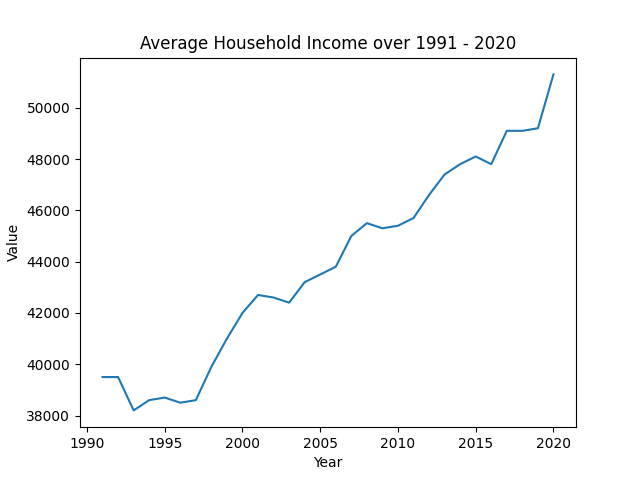

In [14]:
#Basic Household Income average
plt.plot(income_cen["REF_DATE"], income_cen["VALUE"])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Average Household Income over 1991 - 2020')
plt.show()

In [18]:
social_astnce = relevant_census[relevant_census["Statistics"] == "Average income (excluding zeros)"]

social_astnce = social_astnce[(social_astnce['Age group'] == "16 years and over") &
                        (social_astnce['GEO'] == 'Canada') &
                        (social_astnce['Income source'] == 'Social assistance') &
                        (social_astnce['Sex'] == 'Both sexes')]


<IPython.core.display.Javascript object>


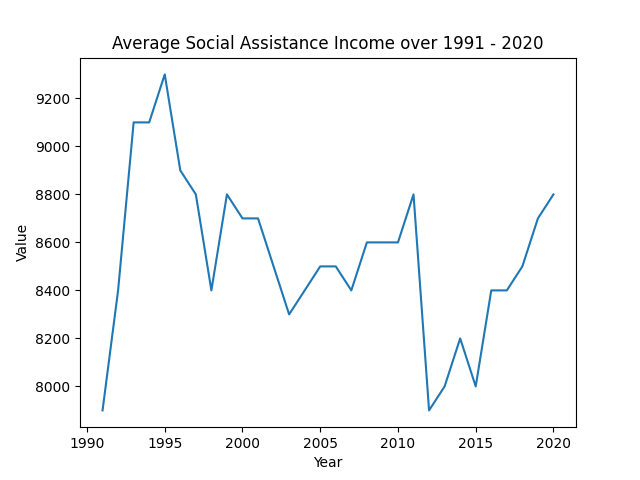

In [19]:
plt.plot(social_astnce["REF_DATE"], social_astnce["VALUE"])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Average Social Assistance Income over 1991 - 2020')
plt.show()



<IPython.core.display.Javascript object>


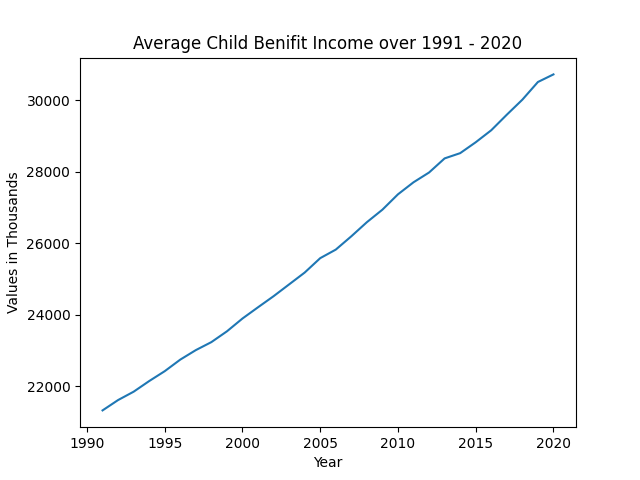

In [16]:
# This feels wrong
child_benifit = number_cen[(number_cen['Age group'] == "16 years and over") &
                        (number_cen['GEO'] == 'Canada') &
                        (number_cen['Income source'] == 'Child benefits') &
                        (number_cen['Sex'] == 'Both sexes')]


plt.plot(child_benifit["REF_DATE"], child_benifit["VALUE"])
plt.xlabel('Year')
plt.ylabel('Values in Thousands')
plt.title('Average Child Benifit Income over 1991 - 2020')
plt.show()

In [42]:
retire_income = retire_income[(retire_income['Age group'] == "16 years and over") &
                        (retire_income['GEO'] == 'Canada') &
                        (retire_income['Income source'] == 'Retirement income') &
                        (retire_income['Sex'] == 'Both sexes')]

retire_amnt = number_cen[(number_cen['Age group'] == "16 years and over") &
                        (number_cen['GEO'] == 'Canada') &
                        (number_cen['Income source'] == 'Retirement income') &
                        (number_cen['Sex'] == 'Both sexes')]

In [43]:
investment_income = investment_income[(investment_income['Age group'] == "16 years and over") &
                        (investment_income['GEO'] == 'Canada') &
                        (investment_income['Income source'] == 'Investment income') &
                        (investment_income['Sex'] == 'Both sexes')]

investment_amnt = number_cen[(number_cen['Age group'] == "16 years and over") &
                        (number_cen['GEO'] == 'Canada') &
                        (number_cen['Income source'] == 'Investment income') &
                        (number_cen['Sex'] == 'Both sexes')]

In [44]:
employment_income = employment_income[(employment_income['Age group'] == "16 years and over") &
                        (employment_income['GEO'] == 'Canada') &
                        (employment_income['Income source'] == 'Employment income') &
                        (employment_income['Sex'] == 'Both sexes')]

employment_amnt = number_cen[(number_cen['Age group'] == "16 years and over") &
                        (number_cen['GEO'] == 'Canada') &
                        (number_cen['Income source'] == 'Employment income') &
                        (number_cen['Sex'] == 'Both sexes')]

<IPython.core.display.Javascript object>


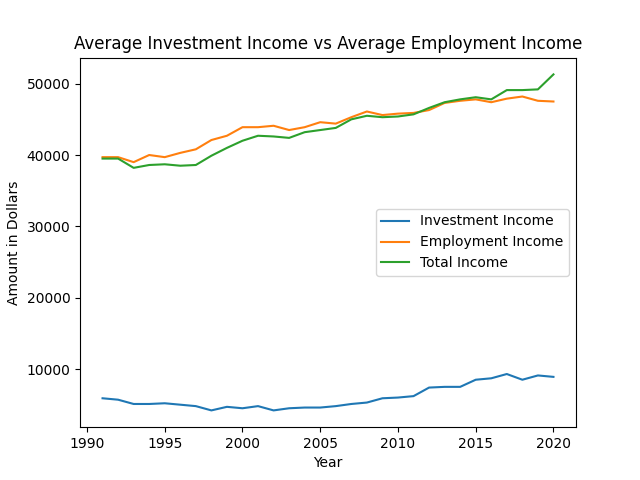

In [53]:
#investment
plt.plot(investment_income["REF_DATE"], investment_income["VALUE"], label="Investment Income")
#employment
plt.plot(employment_income["REF_DATE"], employment_income["VALUE"], label ="Employment Income")
plt.plot(income_cen["REF_DATE"], income_cen["VALUE"], label="Total Income")

plt.xlabel('Year')
plt.ylabel('Amount in Dollars')
plt.title('Average Investment Income vs Average Employment Income')
plt.legend()

plt.show()

In [49]:
#discarded as everyone that is employed invests 

# #investment
# plt.plot(investment_amnt["REF_DATE"], investment_amnt["VALUE"], label="Investment Income")
# #employment
# plt.plot(employment_amnt["REF_DATE"], employment_amnt["VALUE"], label ="Employment Income")


# plt.xlabel('Year')
# plt.ylabel('Values')
# plt.title('Amount of Investment vs Employment')
# plt.legend()

# plt.show()

<IPython.core.display.Javascript object>


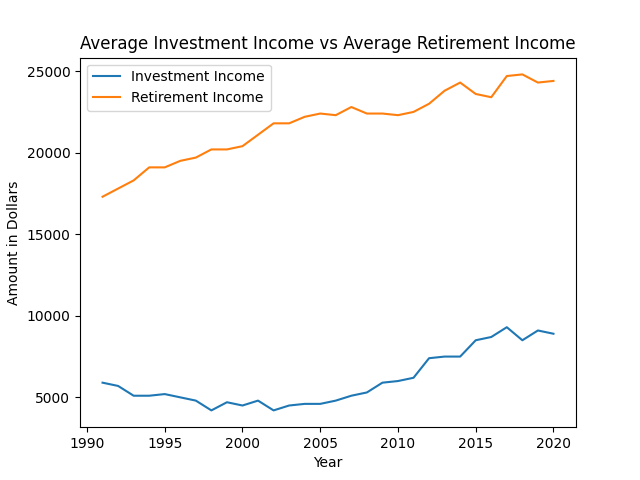

In [52]:
#investment
plt.plot(investment_income["REF_DATE"], investment_income["VALUE"], label="Investment Income")
#retirement
plt.plot(retire_income["REF_DATE"], retire_income["VALUE"], label ="Retirement Income")

plt.xlabel('Year')
plt.ylabel('Amount in Dollars')
plt.title('Average Investment Income vs Average Retirement Income')
plt.legend()

plt.show()

In [39]:
# not much to analize from 
# plt.plot(income_cen["REF_DATE"], income_cen["VALUE"], label="Total Income")
# plt.plot(social_astnce["REF_DATE"], social_astnce["VALUE"], label= "Social Assistance")
# plt.plot(child_benifit["REF_DATE"], child_benifit["VALUE"], label= "Child Benifit")

# plt.xlabel('Year')
# plt.ylabel('Values')
# plt.title('Average Price of Rental Units from 1991 - 2021')
# plt.legend()

# plt.show()

<IPython.core.display.Javascript object>


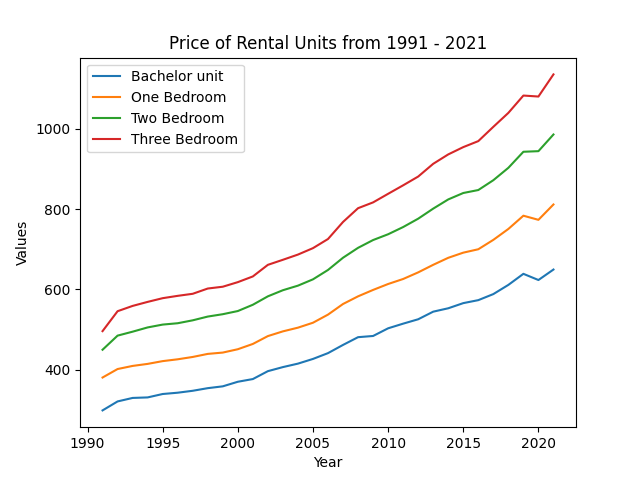

In [50]:
#ave bach
plt.plot(average_bach_df["REF_DATE"], average_bach_df["AVERAGE_VALUE"], label="Bachelor unit")
#ave one bed
plt.plot(average_one_bedroom_df["REF_DATE"], average_one_bedroom_df["AVERAGE_VALUE"], label ="One Bedroom")
#ave two bed
plt.plot(average_two_bedroom_df["REF_DATE"], average_two_bedroom_df["AVERAGE_VALUE"], label ="Two Bedroom")
#ave three bed
plt.plot(average_three_bedroom_df["REF_DATE"], average_three_bedroom_df["AVERAGE_VALUE"], label ="Three Bedroom")




plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Price of Rental Units from 1991 - 2021')
plt.legend()

plt.show()